# Ecuaciones Diferenciales Ordinarias

Una ecuación diferencial ecuación que relaciona una función con sus derivadas. Un caso particular de ecuación diferencial son los sistemas de ecuaciones diferenciales ordinario (EDO)

Para $y = f(t)$ una EDO tiene la siguiente forma general

$$
\frac{\partial^n y}{\partial t^n} = F \left( t, y, \frac{\partial y}{\partial t}, \frac{\partial^2 y}{\partial t^2}, \ldots, \frac{\partial^{n-1} y}{\partial t^{n-1}} \right)
$$

Es decir donde la n-esima derivada de $f(t)$ puede escribirse como una función de $t$ y sus derivadas de orden menor. A continuación veremos un ejemplo de sistema EDO y como resolverlo utilizando `scipy`

El **atractor de Lorenz** es un sistema EDO de primer orden que fue diseñado para describir como el aire se mueve por la atmósfera (convexión)

El sistema tiene tres ecuaciones

$$
\begin{split}
\frac{du}{dt} &= \sigma(v-u) \\
\frac{dv}{dt} &= \rho u -v - uw \\
\frac{dw}{dt} &= uv  - \beta w
\end{split}
$$

donde $\sigma$, $\beta$ y $\rho$ son los parámetros del sistema y $u(0)$, $v(0)$ y $w(0)$ suscondiciones iniciales 


El sistema de Lorenz es un ejemplo de **sistema caótico**: Pequeños cambios en las condiciones iniciales generan grandes cambios en el resultado

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

## Resolviendo ODEs de primer orden con Scipy

Podemos usar el módulo [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) para resolver el sistema y luego graficarlo en tres dimensiones

En particular usaremos la función [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

Primero debemos escribir el sistema de ecuaciones como una función de Python con la forma

```python
def fun(t, y, *args):
    ...
    return dy
```

donde `t` es la variable independiente, `y` son las variables del sistema y `dy` son sus derivadas

In [2]:
sigma, beta, rho = 8., 1.6, 28

def lorenz_system(t, y, *args):
    sigma, beta, rho = args
    u, v, w = y
    du = sigma*(v - u)
    dv = rho*u - v - u*w
    dw = u*v -beta*w
    return du, dv, dw

Luego debemos establecer las condiciones iniciales

In [3]:
u0, v0, w0 = 0, 1, 1.05

También debemos entregar un intervalo para la variable independiente

Por ejemplo si queremos que el sistema parta en $t=0$ y se resuelva hasta $t=100$

In [4]:
span = (0, 100)

Lo último que debemos facilitar es un arreglo que represente los valores de la variable independiente $t$ donde queremos evaluar $y$ 

Esto debe ser un arreglo contenido dentro de `span`, por ejemplo

In [5]:
t = np.linspace(10, 90, num=5000)

Finalmente resolvemos la EDO con

In [6]:
result = scipy.integrate.solve_ivp(fun=lorenz_system, 
                                   y0=(u0, v0, w0), 
                                   t_span=span, 
                                   t_eval=t,
                                   args=(sigma, beta, rho))

El objeto `result` tiene entre sus atributos principales:

- `t`: Un vector con los instantes de tiempo
- `y`: Una matriz con los valores de `y` evaluado en cada uno de los instantes de tiempo
- `message`: Un mensaje que indica si la razón de término del algoritmo

In [7]:
result.message

'The solver successfully reached the end of the integration interval.'

El resultado para cada una de las variables es

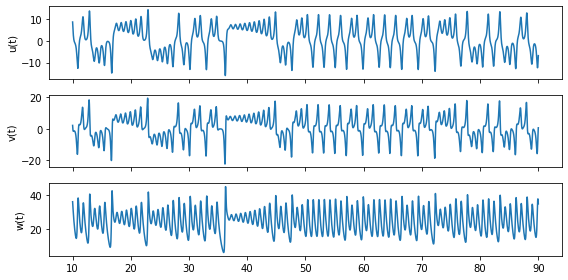

In [8]:
t = result.t
u, v, w = result.y

fig, ax = plt.subplots(3, figsize=(8, 4), 
                       tight_layout=True, sharex=True)
ax[0].plot(t, u); ax[0].set_ylabel('u(t)')
ax[1].plot(t, v); ax[1].set_ylabel('v(t)')
ax[2].plot(t, w); ax[2].set_ylabel('w(t)');

Si lo visualizamos en tres dimensiones

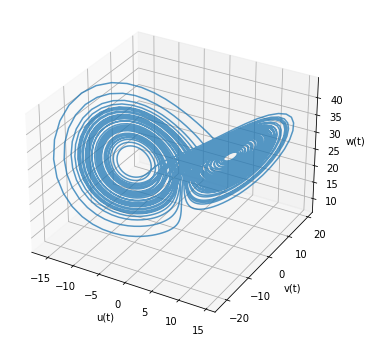

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'3d'})
ax.plot(u, v, w, alpha=0.75)
ax.set_xlabel('u(t)')
ax.set_ylabel('v(t)')
ax.set_zlabel('w(t)');

:::{note}

La solución tiene dos focos de atracción los cuales recorre con distintas orbitas

:::

No es un sistema periódico pues siempre hace orbitas distintas. Tampoco es un sistema estocástico, pues su movimiento sigue un patrón determinista. Eso es la característica del caos

:::{epigraph}
When the present determines the future, but the approximate present does not approximately determine the future

-- [Edward Lorenz](https://en.wikipedia.org/wiki/Edward_Norton_Lorenz)
:::

**Ejercicio propuesto**

El sistema de Lorenz cambia de comportamiento con sus parámetros. Implemente un dashboard con *sliders* para $\sigma$, $\beta$ y $\rho$ y que actualicen el gráfico 3d anterior

:::{seealso}

Otro sistema caótico emblemático: https://geoffboeing.com/2015/03/chaos-theory-logistic-map/

:::